In [1]:
# imorting necessary libraries
import os, shutil
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Creating folder structure
base_dir = r'C:\Users\Honey\Desktop\Keras\CNN_Applications\Cats and Dogs\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [3]:
# copying files from original dataset to respective folders
original_dataset_dir = r'C:\Users\Honey\Desktop\Keras\CNN_Applications\Cats and Dogs\dogs-vs-cats\train\train'
files = ['cat.{}.jpg'.format(i) for i in range(1000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(train_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(validation_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(test_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(train_dogs_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(validation_dogs_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(test_dogs_dir,file)
    shutil.copyfile(source,destination)

In [4]:
print("total training cat images:",len(os.listdir(train_cats_dir)))
print("total training dog images:",len(os.listdir(train_dogs_dir)))
print("total validation cat images:",len(os.listdir(validation_cats_dir)))
print("total validation dog images:",len(os.listdir(validation_dogs_dir)))
print("total testing cat images:",len(os.listdir(test_cats_dir)))
print("total testing dog images:",len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total testing cat images: 500
total testing dog images: 500


In [5]:
#  network architecture
# Sequential class used only for linear stacks of layers
# functional API used for directed acyclic graphs of layers
model = models.Sequential()
# Convolution layer with 32 filters and 3X3 kernel
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 64 filters and 3X3 kernel
model.add(layers.Conv2D(64,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 128 filters and 3X3 kernel
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 128 filters and 3X3 kernel
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Flattening layer
model.add(layers.Flatten())
# Fully connected layer with 512 filters
model.add(layers.Dense(512,activation='relu'))
# Output layer layer with 1 class
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
# compilation step
# binary crossentropy for a two-class classification problem
# categorical crossentropy for a many-class classification problem
# meansquared error for a regression problem
# connectionist temporal classification for a sequence-learning problem
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [7]:
# Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, label_batch in train_generator:
    print('data batch shape: ',data_batch.shape)
    print('labels batch shape: ', label_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [9]:
# Fitting the model using a batch generator
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)


C:\Users\Honey\AppData\Local\Temp\ipykernel_7732\3959621088.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,


Epoch 1/30
100/100 [==============================] - 33s 311ms/step - loss: 0.6885 - acc: 0.5240 - val_loss: 0.6707 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 31s 311ms/step - loss: 0.6597 - acc: 0.6120 - val_loss: 0.6385 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 31s 313ms/step - loss: 0.6052 - acc: 0.6775 - val_loss: 0.6226 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 32s 317ms/step - loss: 0.5690 - acc: 0.7055 - val_loss: 0.6388 - val_acc: 0.6200
Epoch 5/30
100/100 [==============================] - 32s 318ms/step - loss: 0.5391 - acc: 0.7170 - val_loss: 0.5814 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 31s 314ms/step - loss: 0.5117 - acc: 0.7445 - val_loss: 0.5694 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 32s 317ms/step - loss: 0.4886 - acc: 0.7705 - val_loss: 0.5934 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 3

In [10]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')

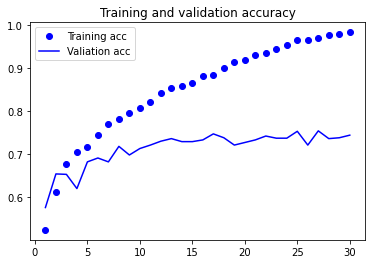

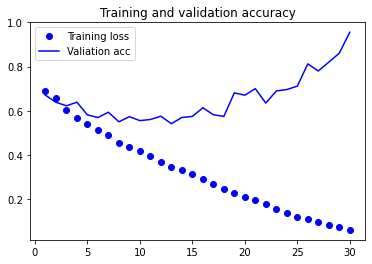

In [11]:
# Displaying curves of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Valiation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Valiation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.show()